# Projeto Final (ATP 2022)

## Ficha t√©cnica

__identificador__: projeto2022;

__t√≠tulo__: People Analytics;

__data in√≠cio__: 2021-11-17;

__autor__: Jos√© Carlos Ramalho, D1513;

__resumo__: Neste projeto, usar√°s todos os conhecimentos adquiridos nas aulas para construir uma aplica√ß√£o para analisar perfis pessoais e estudar tend√™ncias. 

## Requisitos

A tua aplica√ß√£o dever√° fornecer as opera√ß√µes necess√°rias √† gest√£o duma pequena base de dados de indiv√≠duos:

1. Carregar a BD dum ficheiro de texto, com formato definido por ti;
2. Acrescentar √† BD registos provenientes dum dataset com estrutura id√™ntica ao que √© fornecido;
3. Guardar a BD num ficheiro de texto, com formato definido por ti;
4. Inserir um novo indiv√≠duo na base de dados;
5. Consultar um indiv√≠duo na base de dados: a partir do CC/BI ou a partir do nome, por exemplo "Todos os indiv√≠duos com a palavra _Armindo_ no nome;
6. Listar todos os indiv√≠duos por ordem alfab√©tica de nome;
7. Listar todos os indiv√≠duos de uma determinada religi√£o;
8. Listar todos os indiv√≠duos que gostam de um determinado animal;
9. Produzir os seguintes indicadores estat√≠sticos:
    * Quantos indiv√≠duos h√° na BD?
    * Qual a distribui√ß√£o dos indiv√≠duos por profiss√£o?
    * Qual a distribui√ß√£o de indiv√≠duos por desporto (apenas o top10)?

10. A aplica√ß√£o dever√° ter uma interface gr√°fica f√°cil de usar.

Funcionalidades extra:

1. Alterar os dados de um indiv√≠duo;
2. Mostrar os gr√°ficos das distribui√ß√µes numa janela da interface;
3. Para cada animal referenciado na BD, listar os indiv√≠duos, por ordem alfab√©tica, que gostam dele.

## Dataset para arranque

Para poderes povoar a tua aplica√ß√£o √© fornecido um dataset em JSON com 10000 indiv√≠duos.
Durante a defesa, ser-te-√° pedido que acrescentes √† tua BD novos datasets com alguns milhares de indiv√≠duos. A aplica√ß√£o dever√° permitir o carregamento destes datasets aumentando o n√∫mero de indiv√≠duos na BD (nesta opera√ß√£o dever√°s testar se j√° existe algum indiv√≠duo com o CC/BI na BD e nesse caso n√£o importar esse registo).

## A entregar no fim

1. Conjunto de ficheiros que constituem a App desenvolvida;
2. Relat√≥rio t√©cnico do projeto (pode ser um notebook).

(1) Carregar a BD dum ficheiro de texto, com formato definido por ti;

In [2]:
import json #Formato de dados semelhante ao usado em python. T√™m objetos (chave:valor), e todos os mesmos dados. As estruturas de dados s√£o as mesmas, exceto os tuplos que n√£o existem.
#Com json n√£o √© aconselhavel usar append's

def carregarBD(fnome):
    f = open (fnome, "r", encoding='utf-8') #O 'r' n√£o √© obrigat√≥rio pois ele j√° o assume, se n√£o for nada expecificado. 
    bd = json.load(f) #Para ler o ficheiro.
    return bd

BD = carregarBD('dataset.json') 

#individuos = BD['pessoas']
#individuos
ind = BD['pessoas']

ind

[{'nome': 'Roxana Marilyn Munhoz',
  'idade': 91,
  'sexo': 'outro',
  'morada': {'cidade': 'Vila Vi√ßosa', 'distrito': '√âvora'},
  'BI': '10598619-7',
  'descri√ß√£o': 'Ullamco magna ea est nostrud aute dolore non et ea aliquip aliquip et magna. Commodo qui et laboris enim. Id amet nisi non et irure quis do incididunt do.',
  'profissao': 'Sargento da Guarda Nacional Republicana',
  'partido_politico': {'party_abbr': 'PSN',
   'party_name': 'Partido Nacional de Solidariedade'},
  'religiao': 'Candombl√©',
  'desportos': ['Columbofilia', 'Ciclismo'],
  'animais': ['Pato-real', 'Dugongo', 'Ovelha', 'Gorila'],
  'figura_publica_pt': ['√Åurea'],
  'marca_carro': 'Proton',
  'destinos_favoritos': ['Chade', 'Catar', 'Botsuana'],
  'atributos': {'fumador': False,
   'gosta_cinema': False,
   'gosta_viajar': True,
   'acorda_cedo': False,
   'gosta_ler': True,
   'gosta_musica': False,
   'gosta_comer': False,
   'gosta_animais_estimacao': True,
   'gosta_dancar': True,
   'comida_favorita':

(2) Acrescentar √† BD registos provenientes dum dataset com estrutura id√™ntica ao que √© fornecido;

    *DUVIDA*: Como √© que acrescentamos datasets? usamos a fun√ß√£o carregar?

(3) Guardar a BD num ficheiro de texto, com formato definido por ti;

In [7]:
def guardarBD(bd,fnome):
    
    f = open(fnome, "w", encoding = 'utf-8')
    json.dump(bd, f, ensure_ascii = False, indent = 4) #Para escrever no ficheiro. O primeiro √© o que quero fazer dump. E o ficeiro que vai dar dump. #Indent: d√° espa√ßamento para tornar mais f√°cil ler. Quanto maior, mais espa√ßos. #O ensure √© por causa de ^, ~,...

### N√£o esquecer 

. colocar o n√∫mero de resultados sempre


(4) Inserir um novo indiv√≠duo na base de dados;

    *DUVIDA*: S√£o imensos atributos para cada individuo, e nas funcionalidades que o prof pede, apensas usa alguns (religi√£o, desporto, profiss√µes, BI/CC e nome, animais), para inserir um individuo que ele pediu, amos preencher todos os campos ou serria melhor filtrar o dataset que ele tem com os atributos que usamos nas restantes funcionalidades e s√≥ acrescentar mais alguns que usemos, por exemplo para estat√≠stica?

Ter em aten√ß√£o que indiv√≥duos com o mesmo BI n√£o poder√£o ser inseridos. Dar erro!!

In [8]:
#Inserir indiv√≠duo

def inserirIndividuo(bd, nome, idade, sexo, morada, BI, descricao, profissao, partido, religiao, desportos, animais, figuraspublicas, carro, destinos, atributos, fnome):
    individuo = {}
    individuo['nome'] = nome
    individuo['idade'] = idade
    individuo['sexo'] = sexo #checkbox
    individuo['morada'] = morada #dicion√°rio c cidade e distrito  
    individuo['BI'] = BI
    individuo['descri√ß√£o'] = descricao
    individuo['profissao'] = profissao
    individuo['partido_politico'] = partido #dicionario 2 chaves abbr e name
    individuo['religiao'] = religiao
    individuo['desportos'] = desportos #lista
    individuo['animais'] = animais #lista
    individuo['figura_publica_pt'] = figuraspublicas #lista
    individuo['marca_carro'] = carro
    individuo['destinos_favoritos'] = destinos #lista
    individuo['atributos'] = atributos #dicion√°rio com 10 chaves. Checkbox


    bd.append(individuo)
    bd = guardarBD(bd, fnome)
    
    return (ind, bd)



(5) Consultar um indiv√≠duo na base de dados: a partir do CC/BI ou a partir do nome, por exemplo "Todos os indiv√≠duos com a palavra _Armindo_ no nome;

    *DUVIDA*: √© para consultar o nome dos individuos com o mesmo nome/CC ou todas as informa√ß√µes dos mesmos contidas na bd?

In [8]:
def consultar(bd, word):
    individuos=[]
    individuo=[]
    
    '''for pessoa in bd:
        individuos.append(pessoa['nome'])'''
    
    for pessoa in bd:
        if (word.lower()) in (pessoa['nome'].lower()):
            individuo.append(pessoa)
        
    return individuo

print(consultar(ind, 'Roxana'))

[{'nome': 'Roxana Marilyn Munhoz', 'idade': 91, 'sexo': 'outro', 'morada': {'cidade': 'Vila Vi√ßosa', 'distrito': '√âvora'}, 'BI': '10598619-7', 'descri√ß√£o': 'Ullamco magna ea est nostrud aute dolore non et ea aliquip aliquip et magna. Commodo qui et laboris enim. Id amet nisi non et irure quis do incididunt do.', 'profissao': 'Sargento da Guarda Nacional Republicana', 'partido_politico': {'party_abbr': 'PSN', 'party_name': 'Partido Nacional de Solidariedade'}, 'religiao': 'Candombl√©', 'desportos': ['Columbofilia', 'Ciclismo'], 'animais': ['Pato-real', 'Dugongo', 'Ovelha', 'Gorila'], 'figura_publica_pt': ['√Åurea'], 'marca_carro': 'Proton', 'destinos_favoritos': ['Chade', 'Catar', 'Botsuana'], 'atributos': {'fumador': False, 'gosta_cinema': False, 'gosta_viajar': True, 'acorda_cedo': False, 'gosta_ler': True, 'gosta_musica': False, 'gosta_comer': False, 'gosta_animais_estimacao': True, 'gosta_dancar': True, 'comida_favorita': 'italiana'}}, {'nome': 'Denisa Roxana Moacho', 'idade': 2

In [7]:
def consultar(bd, word):
    individuos=[]
    individuo=[]
    
    for pessoa in bd:
        individuos.append(pessoa['nome'])
    
    for nome in individuos:
        if (word.lower()) in (nome.lower()):
            individuo.append(nome)
        
    return individuo

consultar(ind, 'Roxana')


['Roxana Marilyn Munhoz',
 'Denisa Roxana Moacho',
 'Roxana Marilyn Faterio',
 'Roxana Marilyn Feiteiro',
 'Roxana Marilyn Sim√£o']

In [10]:
def consultarBI(bd, bi):
    res = []
    
    for pessoa in bd:
        
        if 'BI' in pessoa.keys():
            
            if pessoa['BI'] == bi:
                res.append(pessoa)
    
    return res

consultarBI(ind, '10598619-7')


[{'nome': 'Roxana Marilyn Munhoz',
  'idade': 91,
  'sexo': 'outro',
  'morada': {'cidade': 'Vila Vi√ßosa', 'distrito': '√âvora'},
  'BI': '10598619-7',
  'descri√ß√£o': 'Ullamco magna ea est nostrud aute dolore non et ea aliquip aliquip et magna. Commodo qui et laboris enim. Id amet nisi non et irure quis do incididunt do.',
  'profissao': 'Sargento da Guarda Nacional Republicana',
  'partido_politico': {'party_abbr': 'PSN',
   'party_name': 'Partido Nacional de Solidariedade'},
  'religiao': 'Candombl√©',
  'desportos': ['Columbofilia', 'Ciclismo'],
  'animais': ['Pato-real', 'Dugongo', 'Ovelha', 'Gorila'],
  'figura_publica_pt': ['√Åurea'],
  'marca_carro': 'Proton',
  'destinos_favoritos': ['Chade', 'Catar', 'Botsuana'],
  'atributos': {'fumador': False,
   'gosta_cinema': False,
   'gosta_viajar': True,
   'acorda_cedo': False,
   'gosta_ler': True,
   'gosta_musica': False,
   'gosta_comer': False,
   'gosta_animais_estimacao': True,
   'gosta_dancar': True,
   'comida_favorita':

In [11]:
def consultarCC(bd, cc):
    res = []
    
    for pessoa in bd:
        
        if 'CC' in pessoa.keys():
            
            if pessoa['CC'] == cc:
                res.append(pessoa)
    
    return res

(6) Listar todos os indiv√≠duos por ordem alfab√©tica de nome;

In [12]:
def ordenarIndividuos(bd):
    individuos=[]
    
    for individuo in bd:
        if individuo['nome'] not in individuos:
            individuos.append(individuo['nome']) 
    
    individuos.sort()
    
    return individuos

ordenarIndividuos(ind)

['Aabaj Neca',
 'Aadilah Lercas',
 'Aaish Bilro',
 'Aalia Fazendeiro',
 'Aalia Salmim',
 'Aaliya Papel',
 'Aalyiah Preciosa',
 'Aamna Gavino',
 'Aaradhya Camelo',
 'Aarayna Anjos',
 'Aareesh Paglione',
 'Aareesh Sam√µes',
 'Aaribah Paixoo',
 "Aarica D'eca",
 'Aariyan Felismina',
 'Aarnav Enxuga',
 'Aaron Ant√≥nio Cabecinhas',
 'Aaron Ant√≥nio Ganilho',
 'AaroÃÅn Luis',
 'Aarusha Fuseiro',
 'Aarusha Pessanha',
 'Aarushi R√©',
 'Aarya Temido',
 'Aaryan Boloto',
 'Aaryav Cabrito',
 'Aar√£o Minas',
 'Aashi Entresede',
 'Aashi Vizo',
 'Aayam Cide',
 'Aayansh Chiquelho',
 'Aayush Ferralho',
 'Aayushi Arcos',
 'Abaan Carochinha',
 'Abby Rebord√£o',
 'Abdel Capaz',
 'Abdel Gamelas',
 'Abdelrahman Ceia',
 'Abdulai R√©sio',
 'Abdullah David',
 'Abdullah Fiteira',
 'Abdulrahman Perpetua',
 'Abduraxmon Rendo',
 'Abd√©nago Antoninho',
 'Abd√∫ J√∫nior Farinha',
 'Abeedha Aveleiro',
 'Abeilard Matos',
 'Abel Francisco Pareira',
 'Abel√¢mio Hasse',
 'Abhinav Ideas',
 'Abhineet Bagina',
 'Abhinoor Sabi

(7) Listar todos os indiv√≠duos de uma determinada religi√£o;

In [13]:
def distReligiao(bd, religiao): 
    res = []

    for individuo in bd: 
        
        if "religiao" in individuo.keys():
            relig = individuo['religiao']
        
        if (relig.lower()) == (religiao.lower()):
            res.append(individuo['nome'])
    
    return res

distReligiao(ind, 'Candombl√©')


['Roxana Marilyn Munhoz',
 'L√≠lia Concei√ß√£o Negromonte',
 'Lawan Salsas',
 'Lanie Chain√ßa',
 'Nurja Carranca',
 'Carlos Fernando Sendas',
 'Agnes Violeta Sacarr√£o',
 'Eva Alexandrina Ad√£o',
 'Gabriela Vict√≥ria Corrente',
 'Rui Afonso Semioo',
 'David Isaac Maneta',
 'Juliana Piedade',
 'Edna Terreiros',
 'Laura Elisabeth Cabeleireiro',
 'Sara In√™s Matamouros',
 'Beatriz Rafael Gradil',
 'Johnatan Levy',
 'Varianne Russo',
 'Savannah Geboes',
 'Pedro Dinis Peeira',
 'Mateo Latino',
 'Marcindo Grosso',
 'Alexander Delfim Norinho',
 'Pablo Romeu Nicolau',
 'Kelve Bal√£o',
 'Liam Alexander Teod√≥sio',
 'Patrick Alexandre Perdigoto',
 'Lily Mariam Portovedo',
 'Nuno Gon√ßalo Boanova',
 'Lucas Xavier Luis',
 'Ayla Gabriela Vareira',
 'Welnir Carrapato',
 'Hianique Bispo',
 'R√≠gel Faleiro',
 'Elisabete Maria Carrolo',
 'Cas Erdoino',
 'Melida Agostinho',
 'Lara Martina Parreira',
 'Nicole Maia Tom√©',
 'SauÃÅl Dorneles',
 'Vasco Xavier Leoo',
 'Leonor Ana√≠s Ruela',
 'Alex Sandro Gra

(8) Listar todos os indiv√≠duos que gostam de um determinado animal;

    *DUVIDA*: Qual a diferen√ßa entre este requisito e o seguinte: 3. Para cada animal referenciado na BD, listar os indiv√≠duos, por ordem alfab√©tica, que gostam dele. ? Neste ultimo temos de listar todas as pessoas para cada animal na BD?

In [14]:
#'animais': ['Pato-real', 'Dugongo', 'Ovelha', 'Gorila']

def animais(bd, pet):
    res = []

    for individuo in bd:
        for animal in individuo['animais']: 
            if animal.lower() == pet.lower(): 
                res.append(individuo['nome'])

    return res

animais(ind, 'Dugongo')

['Roxana Marilyn Munhoz',
 'Lisandro Alexandre Siopa',
 'Geraldine Aveleiro',
 'Paula Loio',
 'M√°rlenie Rebond√£o',
 'Catalina Feitor',
 'Djara Campolargo',
 'Eduard Valentin Vindeirinho',
 'Gabriel Martim Paliteiro',
 'Santiago Emanuel Granacha',
 'India Balonas',
 'Ainny Verdete',
 'Clara Sofia Nereu',
 'Wayela Serra',
 'Clorinda Gentil',
 'Serafim Ant√≥nio Runa',
 'Jo√£o Infante Calleras',
 'Zinga Podoo',
 'Cezar-Damian Taraio',
 'Jaime Maria Giesteira',
 'Alicia Kyra Berto',
 'Laurentiu Pinho',
 'Liandra Medina',
 'AaroÃÅn Luis',
 'Haroun Roloo',
 'Diogo Duarte Nicola',
 'Diogo Duarte Nicola',
 'Lueji Cyrne',
 'Lidu√≠na Vilarandas',
 'Ageu Quintas',
 'Thainara Foitinho',
 'Hristo Sim√£o Bouca',
 'Larcher Farrolas',
 'Djairiny Calha√ßo',
 'Davi Lucca Cravid',
 'Nicole Fabiana Morins',
 'Gustavo Nicolas Condinho',
 'Figo Virgolino',
 'P√°vel Campioo',
 'Zainy Tugueira',
 'Leydiana Fraz√£o',
 'Catarina Susana Antoninho',
 'Aicha do Carmo Palhim',
 'Edgar Francisco Francisca',
 'Stela

(9) Indicadores estat√≠sticos:

9.1. Quantos indiv√≠duos h√° na BD?

In [15]:
def total(bd):
    res = 0

    for individuo in bd: 
        res += 1

    return res

total(ind)

10000

In [16]:
def indivTotal(bd): 
    res = []

    for individuo in bd: 
        res.append(individuo['nome'])

    return len(res)

indivTotal(ind)

10000

In [17]:
def tot(bd): 
    return len(bd)

tot(ind)

10000

9.2. Qual a distribui√ß√£o dos indiv√≠duos por profiss√£o?

In [18]:
def distProfissao(bd): 
    res = {}
    
    for individuo in bd:
        profiss = individuo['profissao']
        
        if profiss in res.keys(): 
            res[profiss] += 1

        else: 
            res[profiss] = 1

    prof = sorted(res.items(), key=lambda x:x[1])
    return prof

distProfissao(ind)


[('Director de produ√ß√£o animal', 3),
 ('Programador de aplica√ß√µes', 3),
 ('Profissional de sa√∫de p√∫blica', 4),
 ('Agente de seguros', 4),
 ('M√©dico de Urologia', 4),
 ('Autor e escritor', 4),
 ('Trabalhador do fabrico de produtos l√°cteos', 4),
 ('Electricista de constru√ß√µes e similares', 4),
 ('Diretor t√©cnico de entidade inspetora de instala√ß√µes de eleva√ß√£o', 5),
 ('Ser√≠grafo e similar', 5),
 ('Auxiliar de enfermagem', 5),
 ('Albardeiro e similares', 5),
 ('Maquinista pr√°tico (1a, 2a e 3a classes)', 5),
 ('Audiologista', 5),
 ('T√©cnico respons√°vel de distribui√ß√£o, comercializa√ß√£o e aplica√ß√£o de produtos fitofarmac√™uticos',
  5),
 ('Profissional de n√≠vel interm√©dio da medicina tradicional e', 5),
 ('Cobrador de facturas e similares', 5),
 ('T√©cnico de informa√ß√£o e comunica√ß√£o aeron√°utica', 5),
 ('Espalhador de betuminosos', 5),
 ('T√©cnico de neurofisiologia', 5),
 ('Docente/Professor do ensino superior polit√©cnico', 6),
 ('Operador de m√°quinas para 

In [19]:
#Fun√ß√£o auxiliar da distribui√ß√£o em plot.

def top20Prof(bd):
    res = distProfissao(bd)

    top10 = res[-20:]

    return top10

print(top20Prof(ind))

[('Autor de projeto', 19), ('Motosserrista', 19), ('Pra√ßa de Comunica√ß√µes (Marinha)', 19), ('Bilheteiro', 19), ('M√©dico de Cardiologia pedi√°trica', 19), ('Ocean√≥grafo', 19), ('Oficial Piloto Aviador', 20), ('Envernizador', 20), ('Condutor de transporte de animais de curta dura√ß√£o', 20), ('Adivinhador e similares', 20), ('M√©dico de Radioterapia/Radioncologia', 21), ('Cozinheiro (Profiss√£o mar√≠tima)', 21), ('T√©cnico em redes e sistemas de computadores', 21), ('Secret√°rio da √°rea da medicina', 21), ('Agente oficial da propriedade industrial', 21), ('T√©cnico de galerias, bibliotecas, arquivos e museus', 22), ('Podologista', 22), ('Pra√ßa de Engenharia Militar', 23), ('Acupuntor', 23), ('T√©cnico operador das tecnologias de informa√ß√£o e comunica√ß√£o (TIC)', 24)]


9.3. Qual a distribui√ß√£o de indiv√≠duos por desporto (apenas o top10)?

In [20]:
def distDesporto(bd): 
    dist = {}

    for indiv in bd: 
        for desporto in indiv['desportos']:

            if desporto in dist.keys(): 
                dist[desporto] += 1

            else: 
                dist[desporto] = 1
    
    desportos = sorted(dist.items(), key=lambda x:x[1])
    desportoss = desportos[-10:]

    return desportoss


distDesporto(ind)

[('Broomball', 414),
 ('Corrida de meio-fundo', 415),
 ('Triatlo', 417),
 ('Lan√ßamento do martelo', 418),
 ('Pentatlo Moderno', 420),
 ('Manbol', 422),
 ('Karat√©', 426),
 ('T√©nis', 744),
 ('Esqui', 750),
 ('Softbol', 778)]

Funcionalidades Extra: 

(1) Alterar os dados de um indiv√≠duo;

    *DUVIDA*: N√£o sei o que fazer :((((((((

In [21]:
def alterarIndividuo(bd, nome, idade, sexo, morada, bi, descricao, profissao, partido, religiao, desportos, animais, figuraspublicas, carro, destinos, atributos, fnome):
    for indiv in bd:
        if indiv['nome'] == nome:
            if botao == "t":
                if criterio==movie['title']:
                    movie['title']=alteracao
                    
            elif botao=="y":
                if criterio==movie['year']:
                    movie['year']=alteracao
                    
            elif botao=="c":
                for i in movie['cast']:
                    if criterio==i:
                        movie['cast'].remove(i)
                        movie['cast'].append(alteracao)
                    
            elif botao=="g":
                for j in movie['genres']:
                    if criterio==j:
                        movie['genres'].remove(j)
                        movie['genres'].append(alteracao)
                
    bd=gravarBD(bd, fnome)
    return (movie, bd)

(2) Mostrar os gr√°ficos das distribui√ß√µes numa janela da interface;

In [22]:
import matplotlib.pyplot as plt

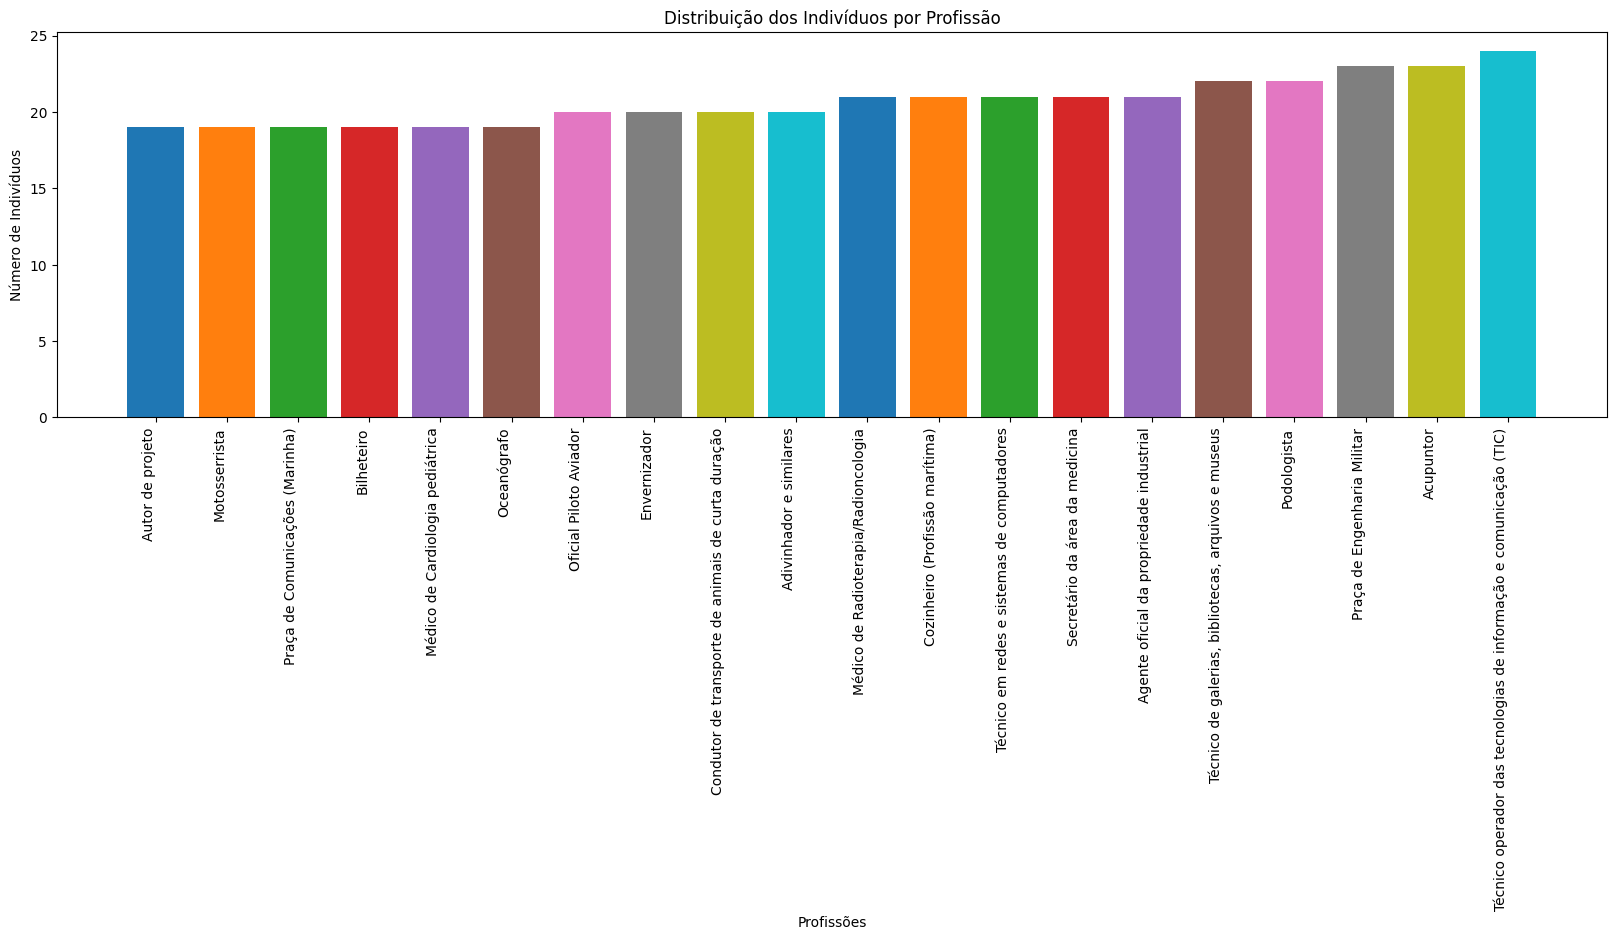

In [23]:
#Uma vez que s√£o muitas profiss√µes, decidimos fazer um top20
def plotDistProfi(bd):
    dist = top20Prof(bd)
    plt_1= plt.figure(figsize=(20,5))

    for tuplo in dist: 
        profissao, nindividuos = tuplo


        plt.bar(profissao, nindividuos)
    
        plt.xlabel('Profiss√µes')
        plt.ylabel('N√∫mero de Indiv√≠duos')

        plt.xticks(rotation=90, ha='right')  #caso queiram que as profiss√µes estejam escritas na vertical. Obrigadaaaaaaaaa

    plt.title('Distribui√ß√£o dos Indiv√≠duos por Profiss√£o')
    plt.show

    return


plotDistProfi(ind)

    *DUVIDA*: Neste gr√°fico a primeira barra n√£o aparece porque est√° ao nivel do primeiro valor. Isto √© normal ou h√° alguma coisa no codigo errada? O anterior ficou bem : (

In [24]:
def plotDistrib(distrib):
    
    plt.bar(distrib.keys(), distrib.values())
    plt.xticks([x for x in range(0, len(distrib.keys()))], distrib.keys(), rotation='vertical')
    plt.show()
    return

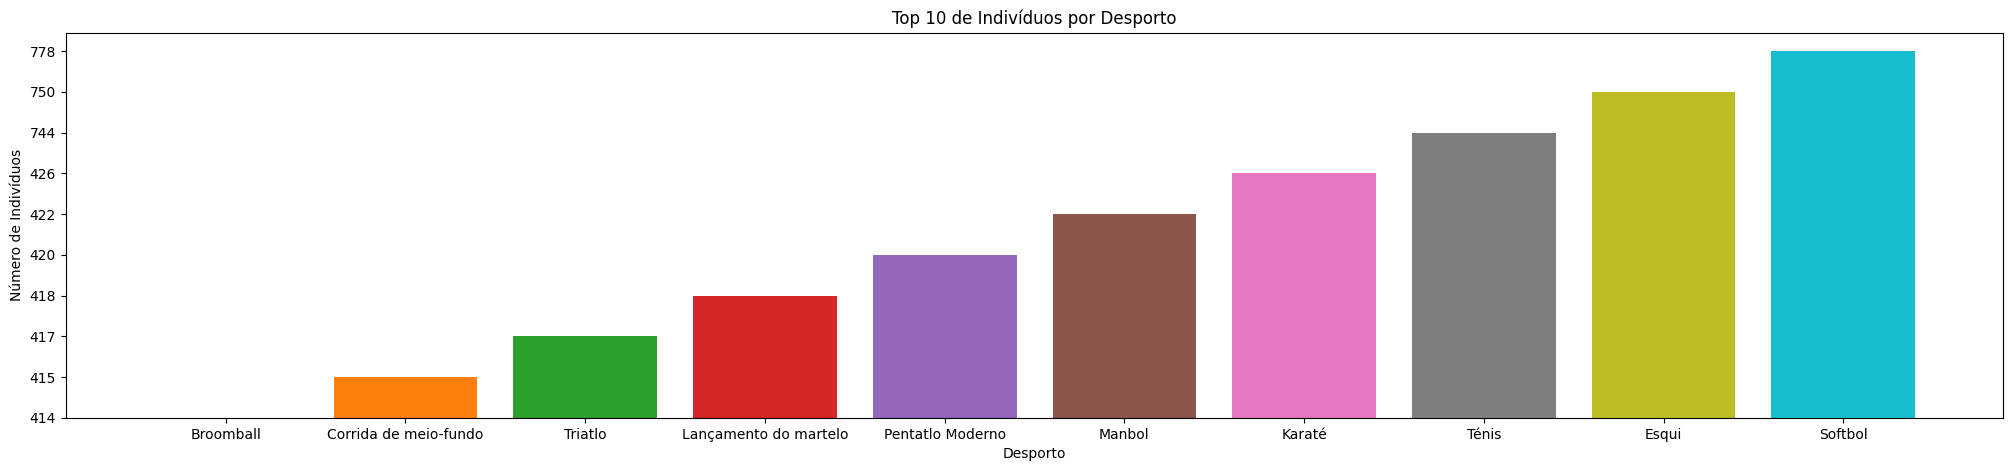

In [25]:
def plotDistDesporto(bd):
    lista = distDesporto(bd)

    plt_1= plt.figure(figsize=(25,5))

    for desportos in lista: 
        desporto, nindividuos = desportos


        plt.bar(desporto, str(nindividuos))
        plt.xlabel('Desporto')
        plt.ylabel('N√∫mero de Indiv√≠duos')


    plt.title('Top 10 de Indiv√≠duos por Desporto')
    plt.show

    return

plotDistDesporto(ind)

(3) Para cada animal referenciado na BD, listar os indiv√≠duos, por ordem alfab√©tica, que gostam dele;

WHAAAAAAT?

In [26]:
def listarAnimais(bd):
    res = {} 

    for individuo in bd: 
        for pet in individuo['animais']:
            if pet not in res.keys():
                indv_animal = animais(bd,pet)
                indv_animal.sort()
                res[pet] = indv_animal
    return res

listarAnimais(ind) 

{'Pato-real': ['Alexandre Daniel Time',
  'Alma Coxixo',
  'Amadeo Lewis Loreiro',
  'Ana Sofia Carina Regadas',
  'Ant√≥nio Daniel Pessoa',
  'Ariel Otchaly Dentas',
  'Arnoor Felgar',
  'Axel Novato Carrinho',
  'Ayla Isabella Paios',
  'A√ßucena Raquel Toga',
  'Baguandas Drago',
  'Beatriz Ladeiro',
  'Beatriz Pedro Correia',
  'Bebiana Braz',
  'Bruno Gabriel Adaixo',
  'B√°rbara Lu√≠sa Remigio',
  'Carlota Filipa Militoo',
  'Carmim Cabo',
  'CeciÃÅlia Greg√≥rio',
  'Cezar-Damian Taraio',
  'Claudemira Rua',
  'Danniielly Pranchas',
  'Deliandra Guadalupe Colchete',
  'Diamanta Lascas',
  'Diego Enzo Vigo√ßo',
  'Dinis Rafael Canh√£o',
  'Diogo Valente Mendanha',
  'Douglas Manoel Montalvoo',
  'D√°rio Daniel Alfredo',
  'Edmara Escalhorda',
  'Eliana Vitalievna Vit√©m',
  'Elias Alexandru Metelo',
  'Eli√°n Atanasio',
  'Emi Breda',
  'Emilia Barrol',
  'Eriana Rafaela Cascalheira',
  'Estevana Justiniano',
  'Eva Catarina Tenente',
  'Fernanda dos Milagres Valbom',
  'Finn Quit

(10) A aplica√ß√£o dever√° ter uma interface gr√°fica f√°cil de usar.

    *DUVIDA*: Nem sei por onde come√ßar, desculpa :(((

    A minha ideia era ter uma janela de login que ja est√° aqui no c√≥digo, e outra coisa que √© necess√°rio fazer √© usar o ultimo bloco de c√≥digo que nos permite aparecer uma janela para ir buscar a pasta que queremos (penso que seria naquela funcionalisade de acrescentar datasets extra ao existente), heeelp

# COLOCAR SEMPRE O NUMERO DE RESULTADOS LEN

Funcionalidades Auxiliares √† Interface gr√°fica

In [28]:
def removerGuardar(bd, name, fnome):

    for pessoa in bd:
        if pessoa['nome']==name:
            bd.remove(pessoa)
            
            bd = guardarBD(bd,fnome)
    
    return bd

In [29]:
import PySimpleGUI as sg

In [30]:
import PySimpleGUI as sg

loginLayout = [[sg.Text('Introduza as suas credenciais para efetuar o Login:')],
          [sg.Text('UserName:', size=(10, 1)), sg.InputText(key='-USER-')],
          [sg.Text('PassWord:', size=(10, 1)), sg.InputText(key='-PASS-')],
          [sg.Button('Entrar'), sg.Button('Cancelar')]]

appLayout = [[sg.Text("Conseguiu entrar na Aplica√ß√£o.")]]

erroLayout = [[sg.Text("Credenciais inv√°lidas, tente novamente.")]]

loginForm = sg.Window('Login', loginLayout, location=(0,0), font=('Arial', 18))
event, values = loginForm.read(close=True)

if event == 'Entrar':
    if values['-USER-']=='admin' and values['-PASS-']=='000':
        print('Evento: ', event, 'Dados: ', values['-USER-'], values['-PASS-'])
        appWindow = sg.Window('A Minha Aplica√ß√£o', appLayout, location=(50,50), font=('Arial', 30)).read(close=True)
    else:
        print("Credenciais inv√°lidas, tente novamente.")
        erroWindow = sg.Window('Oops! Something went wrong...', erroLayout, location=(50,50), font=('Arial', 30)).read()
else:
    print('Aplica√ß√£o encerrada.')

Aplica√ß√£o encerrada.


1. Janela ?

In [31]:

bd=[]
lb=[] 

loginLayout = [[sg.Button('Carregar', size=(15,2), button_color = 'peru', font=('Arial', 11))],
                 [sg.Button('Inserir um novo Indiv√≠duo', size=(15,2), button_color = 'peru', font=('Arial', 11))],
                 [sg.Button('Ordenar alfabeticamente os indiv√≠duos', size=(15,2), button_color = 'peru', font=('Arial', 11))],
                 [sg.Button('Dados Estat√≠sticos', size=(15,2), button_color = 'peru', font=('Arial', 11))],
                 [sg.Button('Exit', size=(15,2), button_color = 'peru', font=('Arial', 11))]]

data_viewer_column=[[sg.Listbox(values=lb, size=(138,25), background_color = 'white', font='Arial 10', key='_lb')]]

layout=[[sg.Text("üë§                PEOPLE ANALYTICS                     ", 
                 font="Helvitica 42",background_color = 'beige', text_color = 'peru')],
        [sg.Input(size=(105,1), default_text='Insira o filme, g√©nero ou ator que quer pesquisar... ', background_color = 'white', 
        text_color = 'grey', key='_int'), sg.Button('Pesquisar Indiv√≠duo', button_color = 'peru', size=(15,1), font=('Arial', 10)),
         sg.Button('Pesquisar g√©nero', button_color = 'peru', size=(15,1), font=('Arial', 10)), 
         sg.Button('Pesquisar ator', button_color = 'peru', size=(15,1), font=('Arial', 10))],
        [sg.HSeparator(color='peru')],
        [sg.Column(loginLayout, background_color = 'beige'),
        sg.VSeperator(color='peru'),
        sg.Column(data_viewer_column,  background_color = 'beige')]]

window = sg.Window(title="CINEMATECA", margins=(100,50), background_color = 'beige').Layout(layout)

In [32]:
def janelaProfissao(bd):
    sg.theme('DarkBlack')
    indiv=[]
    profis=[]
    p=distProfissao(bd)
    for chave in g.keys():
        profis.append(chave)
        profis.sort()
    profissao=[
        [sg.Button('Procurar'),sg.Button('Listar todos os Individuos')],
        [sg.Listbox(values=profis,key='-gnr',size=(25,30))],
        [sg.Button('Distribui√ß√£o por G√©neros',size=(23))]
    ]
    interface=[
        [sg.Column(profis),
        sg.Listbox(values=filmes,key='-profissao',size=(200,150)),
        sg.Canvas(key='-canvas')]
    ]
    
    
    window=sg.Window('G√©neros',size=(900,600)).Layout(interface)

    stop=False
    while not stop:
        event,values=window.read()
        if event == sg.WIN_CLOSED:
            stop = True
        elif event == 'Procurar':
            if len(values['-prof'])>0:
                indiv=fil.genero(bd,values['-prof'][0])
                window.find_element('-profissao').update(filmes)
        elif event == 'Listar todos os filmes':
            filmes=fil.indGeneros(BD)
            window.find_element('-profissao').update(filmes)
        elif event == 'Distribui√ß√£o por Profiss√£o':
            fig=fil.plotDistribGenero(bd)
            fig_canvas_agg=fil.draw_figure(window['-canvas'].TKCanvas,fig)
    window.close()

Janela das pastas. 

In [33]:
import os
import PySimpleGUI as sg

file_list_column = [
    [
        sg.Text('Pasta'),
        sg.In('ficheiro selecionado', size=(30, 1), enable_events=True, key="-PASTA-"),
        sg.FolderBrowse()
    ],
    [
        sg.Listbox(values=[], enable_events=True, size=(36, 20), key="-LISTA-")
    ]]

file_viewer_column = [ 
    [sg.Text("Seleciona uma pasta", size=(20, 1))],
    [sg.Text("Nome do ficheiro", size=(50, 3), key="-NOME-")],
    [sg.Multiline(size=(70, 30), key="-CONTEUDO-")],
    [sg.Button("Save")]
]

layout = [[
    sg.Column(file_list_column),
    sg.VSeparator(),
    sg.Column(file_viewer_column)
]]

window = sg.Window("Visualizador de ficheiros", layout, font=('Arial', 24))

folder_location = ""
stop = False

while not stop:
    event, values = window.read()

    print(event, values)

    if event in [sg.WIN_CLOSED, "EXit"]:
        stop = True
    elif event == "-PASTA-":
        folder_location = values["-PASTA-"]
        try:
            files = os.listdir(folder_location)
        except:
            files = []


        print(files)

        filenames = [
            file for file in files
            if os.path.isfile(os.path.join(folder_location, file))
            and file.lower().endswith((".txt", ".csv", ".json", ".py"))
        ]
        window["-LISTA-"].update(filenames)
    
    elif event == "-LISTA-" and len(values["-LISTA-"]) > 0:
        file_selection = values["-LISTA-"][0]
        file = open(os.path.join(folder_location, file_selection))
        contents = file.read()
        window["-NOME-"].update(os.path.join(folder_location, file_selection))
        window["-CONTEUDO-"].update(contents)

    elif event == "Save" and len(values["-LISTA-"]) > 0:
        file_selection = values["-LISTA-"][0]
        file = open(os.path.join(folder_location, file_selection), "w")
        file.write(values["-CONTEUDO-"])

window.close()
exit()

None {'-PASTA-': None, 'Browse': None, '-LISTA-': None, '-CONTEUDO-': None}


: 